#Exploring the data

In [ ]:
import pandas as pd #help to extract data 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #graph et operations

In [ ]:
data = pd.read_csv("/content/data.csv")

In [ ]:
data

,ID,house_type,Year_Built,Neighborhood,House_Size,Number_of_Bedrooms,Number_of_Bathrooms,Distance_to_School,House_Price
0,0,villa,1998.0,Downtown,242,2,2.0,2.275930,84997.411280
1,1,Apartment,2013.0,Old Town,117,2,NaN,0.917376,45820.683195
2,2,villa,1985.0,Suburban,187,5,3.0,4.226590,31734.324810
3,3,Apartment,1997.0,Downtown,262,5,1.0,1.677467,53791.375910
4,4,villa,1990.0,Suburban,393,3,3.0,0.876409,93017.091090
...,...,...,...,...,...,...,...,...,...
1174,1195,Apartment,2014.0,Old Town,183,2,NaN,0.604402,40623.662130
1175,1196,Apartment,1985.0,Old Town,465,2,NaN,3.345903,125465.886600
1176,1197,villa,1988.0,Old Town,275,5,NaN,3.059655,60730.276840
1177,1198,Apartment,1996.0,Downtown,448,4,3.0,3.712758,92576.586700


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1179 non-null   int64  
 1   house_type           1179 non-null   object 
 2   Year_Built           1178 non-null   float64
 3   Neighborhood         1179 non-null   object 
 4   House_Size           1179 non-null   int64  
 5   Number_of_Bedrooms   1179 non-null   int64  
 6   Number_of_Bathrooms  885 non-null    float64
 7   Distance_to_School   1179 non-null   float64
 8   House_Price          1179 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 83.0+ KB


In [ ]:
data.describe()

,ID,Year_Built,House_Size,Number_of_Bedrooms,Number_of_Bathrooms,Distance_to_School,House_Price
count,1179.000000,1178.000000,1179.000000,1179.000000,885.000000,1179.000000,1179.000000
mean,600.707379,2000.889643,291.791349,3.466497,1.975141,2.631106,75377.836647
std,345.813084,12.301427,122.508482,1.116867,0.815193,1.449036,32157.389448
min,0.000000,1980.000000,70.000000,2.000000,1.000000,0.106468,693.596924
25%,302.500000,1990.000000,185.000000,2.000000,1.000000,1.377528,49402.945415
50%,600.000000,2001.000000,290.000000,3.000000,2.000000,2.648117,73155.243460
75%,900.500000,2011.000000,404.000000,4.000000,3.000000,3.960190,99798.654165
max,1199.000000,2022.000000,499.000000,5.000000,3.000000,4.999497,178437.102300


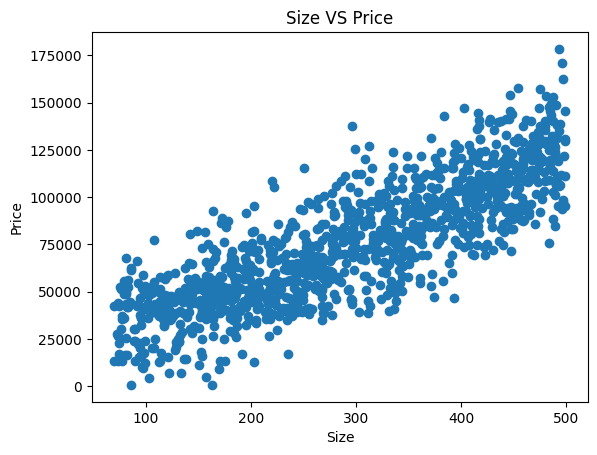

In [ ]:
plt.scatter(data['House_Size'],data['House_Price'])
plt.title('Size VS Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='house_type', ylabel='count'>

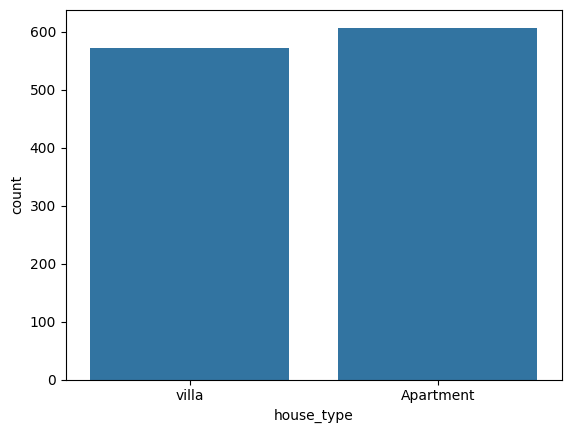

In [ ]:
sns.countplot(data=data,x='house_type')

<Axes: xlabel='Neighborhood', ylabel='count'>

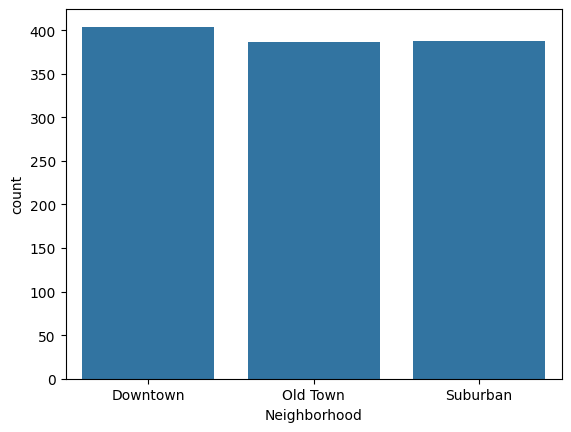

In [ ]:
sns.countplot(data=data,x='Neighborhood')

<Axes: xlabel='Number_of_Bedrooms', ylabel='count'>

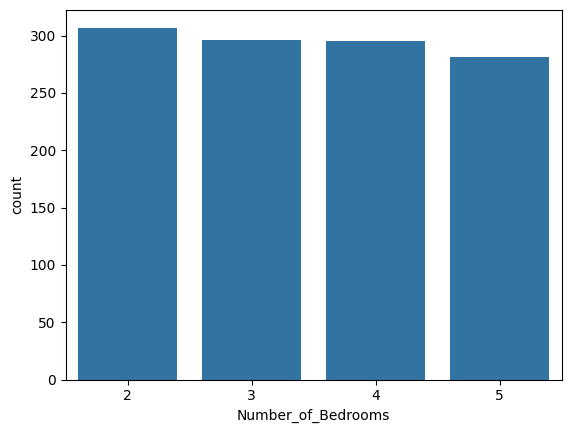

In [ ]:
sns.countplot(data=data,x='Number_of_Bedrooms')

#Handling NaN values

In [ ]:
data.isna().sum()

ID                       0
house_type               0
Year_Built               1
Neighborhood             0
House_Size               0
Number_of_Bedrooms       0
Number_of_Bathrooms    294
Distance_to_School       0
House_Price              0
dtype: int64

In [ ]:
data = data.dropna(subset=['Year_Built'])

In [ ]:
def handle_bthr_nan(data):
  for index, row in data.iterrows():
    #Here we check if the "Number_of_Bathrooms" is NaN
    if pd.isna(row['Number_of_Bathrooms']):
        num_bathrooms = row['Number_of_Bedrooms'] // 2
        data.at[index, 'Number_of_Bathrooms'] = num_bathrooms

In [ ]:
handle_bthr_nan(data)

In [ ]:
data.isna().sum()

ID                     0
house_type             0
Year_Built             0
Neighborhood           0
House_Size             0
Number_of_Bedrooms     0
Number_of_Bathrooms    0
Distance_to_School     0
House_Price            0
dtype: int64

#Dealing with categorical features

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical features:{cat_cols}")

Categorical features:['house_type', 'Neighborhood']


In [ ]:
data['house_type'].unique()

array(['villa', 'Apartment'], dtype=object)

#One Hot Econding

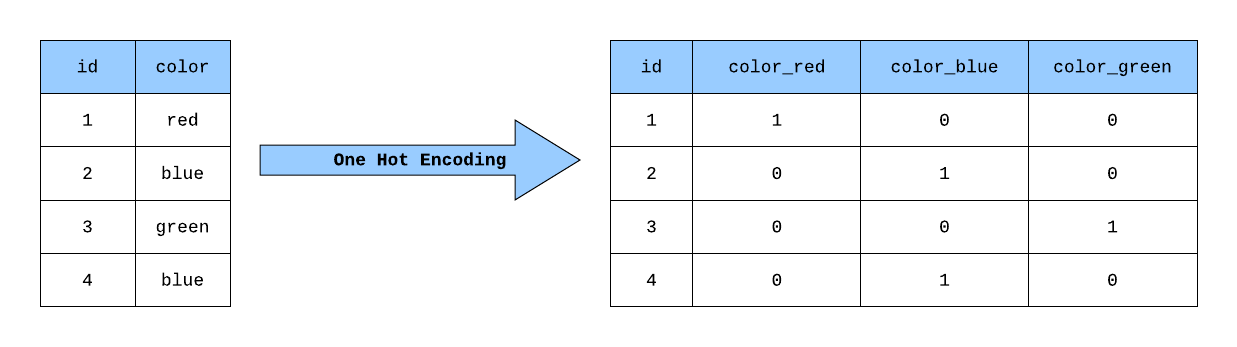

In [ ]:
data = pd.get_dummies(data, columns=[cat_cols[0]])

In [ ]:
data.head()

,ID,Year_Built,Neighborhood,House_Size,Number_of_Bedrooms,Number_of_Bathrooms,Distance_to_School,House_Price,house_type_Apartment,house_type_villa
0,0,1998.0,Downtown,242,2,2.0,2.275930,84997.411280,0,1
1,1,2013.0,Old Town,117,2,1.0,0.917376,45820.683195,1,0
2,2,1985.0,Suburban,187,5,3.0,4.226590,31734.324810,0,1
3,3,1997.0,Downtown,262,5,1.0,1.677467,53791.375910,1,0
4,4,1990.0,Suburban,393,3,3.0,0.876409,93017.091090,0,1


#Label Encoding
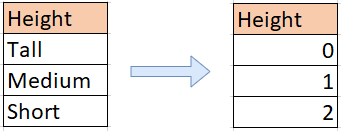



In [ ]:
data['Neighborhood'].unique()

array(['Downtown', 'Old Town', 'Suburban'], dtype=object)

In [ ]:
class_mapping = {'Old Town': 1, 'Downtown': 2, 'Suburban': 3}

In [ ]:
data['encoded_Neighborhood'] = data['Neighborhood'].map(class_mapping)
data.drop('Neighborhood', axis=1, inplace= True)

In [ ]:
data

,ID,Year_Built,House_Size,Number_of_Bedrooms,Number_of_Bathrooms,Distance_to_School,House_Price,house_type_Apartment,house_type_villa,encoded_Neighborhood
0,0,1998.0,242,2,2.0,2.275930,84997.411280,0,1,2
1,1,2013.0,117,2,1.0,0.917376,45820.683195,1,0,1
2,2,1985.0,187,5,3.0,4.226590,31734.324810,0,1,3
3,3,1997.0,262,5,1.0,1.677467,53791.375910,1,0,2
4,4,1990.0,393,3,3.0,0.876409,93017.091090,0,1,3
...,...,...,...,...,...,...,...,...,...,...
1174,1195,2014.0,183,2,1.0,0.604402,40623.662130,1,0,1
1175,1196,1985.0,465,2,1.0,3.345903,125465.886600,1,0,1
1176,1197,1988.0,275,5,2.0,3.059655,60730.276840,0,1,1
1177,1198,1996.0,448,4,3.0,3.712758,92576.586700,1,0,2


In [ ]:
#Creating a new feature house_age
data['house_age']=data['Year_Built'].apply(lambda x : 2024-x)
data.drop('Year_Built',axis=1, inplace= True)

In [ ]:
data

,ID,House_Size,Number_of_Bedrooms,Number_of_Bathrooms,Distance_to_School,House_Price,house_type_Apartment,house_type_villa,encoded_Neighborhood,house_age
0,0,242,2,2.0,2.275930,84997.411280,0,1,2,26.0
1,1,117,2,1.0,0.917376,45820.683195,1,0,1,11.0
2,2,187,5,3.0,4.226590,31734.324810,0,1,3,39.0
3,3,262,5,1.0,1.677467,53791.375910,1,0,2,27.0
4,4,393,3,3.0,0.876409,93017.091090,0,1,3,34.0
...,...,...,...,...,...,...,...,...,...,...
1174,1195,183,2,1.0,0.604402,40623.662130,1,0,1,10.0
1175,1196,465,2,1.0,3.345903,125465.886600,1,0,1,39.0
1176,1197,275,5,2.0,3.059655,60730.276840,0,1,1,36.0
1177,1198,448,4,3.0,3.712758,92576.586700,1,0,2,28.0


In [ ]:
X = data.drop(['House_Price','ID'],axis=1)
y = data['House_Price']

#Feature Scaling

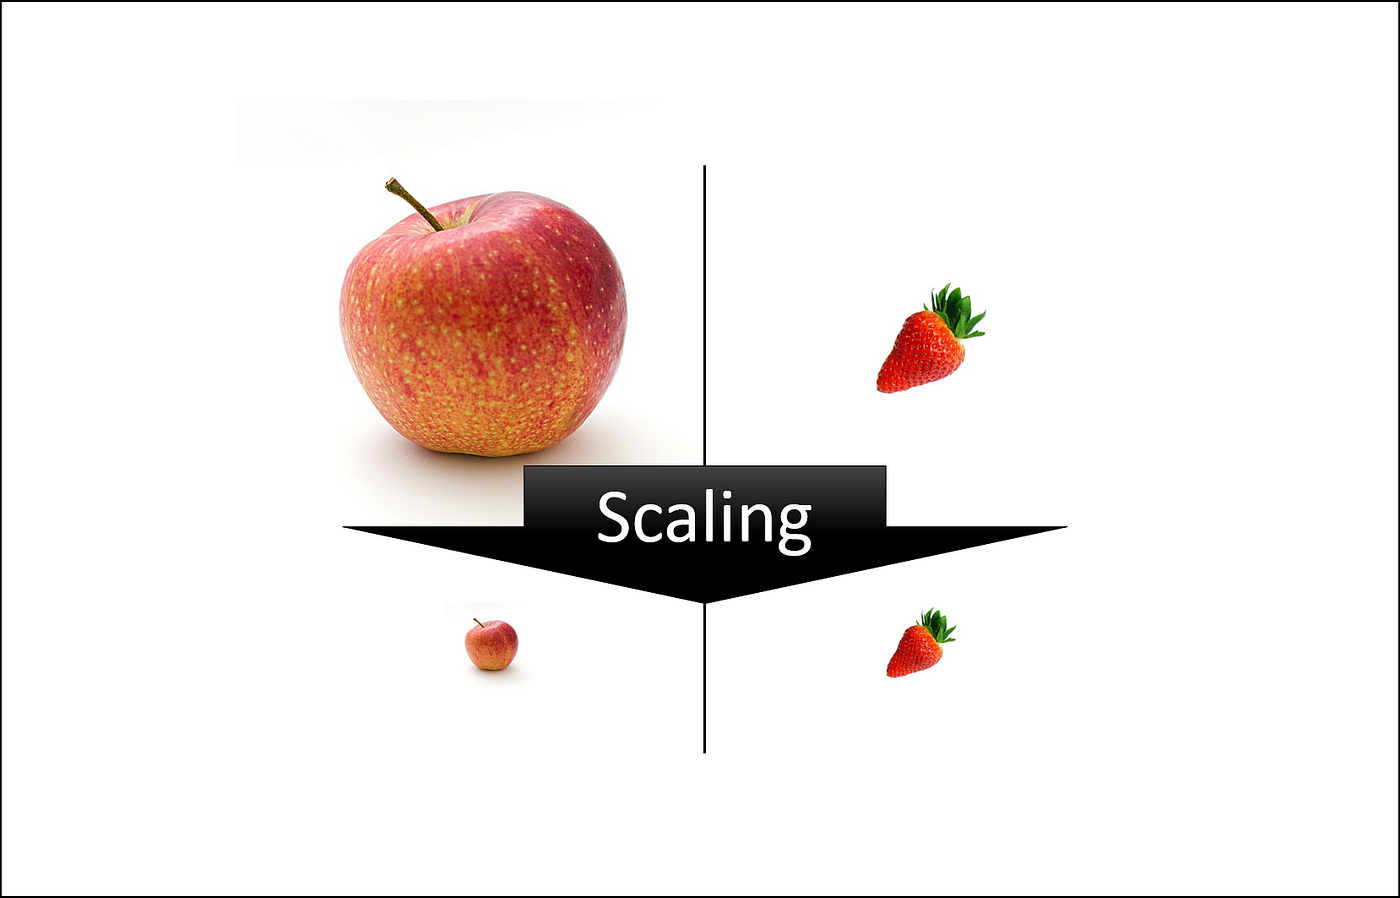

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Modelling

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 18053.6786171329
